In [0]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train, x_test=x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2998 - acc: 0.9118
Epoch 2/6
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1465 - acc: 0.9560
Epoch 3/6
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1097 - acc: 0.9670
Epoch 4/6
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0889 - acc: 0.9728
Epoch 5/6
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0767 - acc: 0.9754
Epoch 6/6
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0663 - acc: 0.9789


In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0736 - acc: 0.9794


[0.07357972454186529, 0.9794]

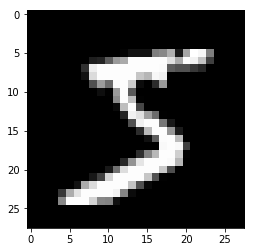

In [8]:
plt.imshow(x_train[0], cmap='gray')

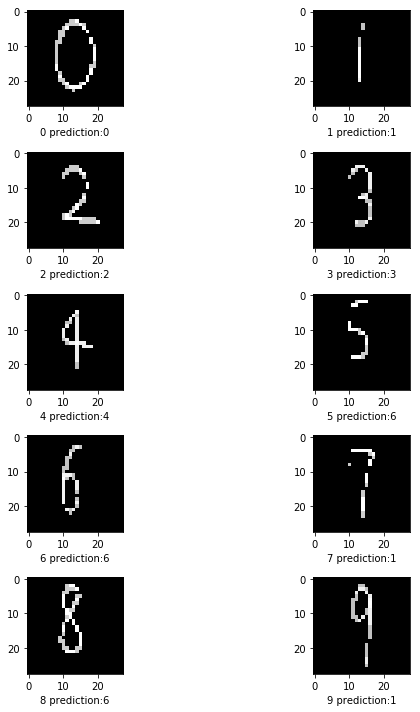

In [10]:
fig=plt.figure(figsize=[10,10])
rows=5
cols=2
for i in range(0, 10):
  ax=fig.add_subplot(rows, cols, i+1)
  im=Image.open(str(i)+'.png')
  im=im.resize((28, 28))
  im=im.convert('L')
  test_data=np.asarray(im)
  test_data=test_data/255.0
  pred=model.predict_classes([[test_data]])
  ax.imshow(test_data, cmap='gray')
  ax.set_xlabel('{} prediction:{}'.format(i, pred[0]))
plt.tight_layout()
plt.show()